## Merging data found with scrapper  

In [1]:
import pandas as pd
import seaborn as sns
import os.path
from datetime import date
import modules.personal_data as secret
from modules.api_functions import SpotApi
import matplotlib.pyplot as plt
import modules.utils as util
from modules.scraper.scraper import get_charts
sns.set_theme(style="whitegrid")
spotify_api = SpotApi(
    client_id = secret.client_id,
    username = secret.username,
    client_secret = secret.client_secret,
    redirect_uri = secret.redirect_uri,
    scope = secret.scope
)

In [2]:
def merge_top_with_descriptions(tops):
    data_merged = []
    for top_50 in tops:
        audio_descriptions = []
        today = date.today().strftime("%b-%d-%Y")
        if os.path.exists(f"./data/spotifycharts_viral_{top_50}_daily_latest_{today}.csv"):
            top_50 = pd.read_csv("./data/spotifycharts_viral_{top_50}_daily_latest_{today}.csv")
        else:
            top_50 = get_charts("viral", top_50, "daily", "latest")
        for index, row in top_50.iterrows():
            track = spotify_api.search_track(row["track"], row["artists"][0])
            description = spotify_api.get_audio_description(track["id"])
            description["explicit"] = track["explicit"]
            description["popularity"] = track["popularity"]
            audio_descriptions.append(description)  
        df_audio_descriptions = pd.DataFrame.from_records(audio_descriptions)
        df_merge = pd.concat([top_50, df_audio_descriptions], axis=1)
        data_merged.append(df_merge)
    return data_merged

In [3]:
countries = ["br", "us", "pt", "kr"]
top_50_daily = merge_top_with_descriptions(["br", "us", "pt", "kr"])
df_top_50_daily = pd.concat(top_50_daily, keys=countries)

In [4]:
df_top_50_daily = df_top_50_daily.reset_index(0)
df_top_50_daily = df_top_50_daily.rename(columns={"level_0": "country"})
df_top_50_daily.head()

,country,url,img,position,track,artists,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,explicit,popularity
0,br,https://open.spotify.com/track/2G3pr93yMNJ2HcL...,https://i.scdn.co/image/ab67616d00004851f2fe6b...,1,Antes de Ir,"[Taty pink, Romeu]",0.738,0.595,8.0,-3.333,...,131.876,audio_features,4Wj2SSD4xTBclVAGpazquw,spotify:track:4Wj2SSD4xTBclVAGpazquw,https://api.spotify.com/v1/tracks/4Wj2SSD4xTBc...,https://api.spotify.com/v1/audio-analysis/4Wj2...,189096.0,4.0,False,57.0
1,br,https://open.spotify.com/track/1Adhz5VVDZxhojO...,https://i.scdn.co/image/ab67616d000048512d18ce...,2,Not Around,[Nova],0.500,0.694,6.0,-9.452,...,131.006,audio_features,1Adhz5VVDZxhojOLfQQUxa,spotify:track:1Adhz5VVDZxhojOLfQQUxa,https://api.spotify.com/v1/tracks/1Adhz5VVDZxh...,https://api.spotify.com/v1/audio-analysis/1Adh...,183920.0,4.0,True,74.0
2,br,https://open.spotify.com/track/2DCFVhnc9a7OVCs...,https://i.scdn.co/image/ab67616d00004851012655...,3,Eu Imagino Tu Dentro da Minha Casa,[Gxlherm Beats],0.712,0.573,10.0,-10.447,...,140.024,audio_features,2DCFVhnc9a7OVCsUC8BFtA,spotify:track:2DCFVhnc9a7OVCsUC8BFtA,https://api.spotify.com/v1/tracks/2DCFVhnc9a7O...,https://api.spotify.com/v1/audio-analysis/2DCF...,142304.0,4.0,True,47.0
3,br,https://open.spotify.com/track/3DICBZOMaEWbCxw...,https://i.scdn.co/image/ab67616d000048519b84fb...,4,Everywhereigo,[Babyxsosa],0.892,0.384,11.0,-12.975,...,140.091,audio_features,3DICBZOMaEWbCxwUfPGcE5,spotify:track:3DICBZOMaEWbCxwUfPGcE5,https://api.spotify.com/v1/tracks/3DICBZOMaEWb...,https://api.spotify.com/v1/audio-analysis/3DIC...,135471.0,4.0,True,74.0
4,br,https://open.spotify.com/track/0wvV4P3u4wnVggA...,https://i.scdn.co/image/ab67616d00004851c7a709...,5,Viela,[Marcynho Sensação],0.825,0.849,8.0,-7.024,...,170.078,audio_features,0wvV4P3u4wnVggA8cCDGTJ,spotify:track:0wvV4P3u4wnVggA8cCDGTJ,https://api.spotify.com/v1/tracks/0wvV4P3u4wnV...,https://api.spotify.com/v1/audio-analysis/0wvV...,152483.0,4.0,False,60.0


In [10]:
df_top_50_daily = df_top_50_daily.convert_dtypes()
df_top_50_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 49
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           200 non-null    string 
 1   url               200 non-null    string 
 2   img               200 non-null    string 
 3   position          200 non-null    Int64  
 4   track             200 non-null    string 
 5   artists           200 non-null    object 
 6   danceability      199 non-null    Float64
 7   energy            199 non-null    Float64
 8   key               199 non-null    Int64  
 9   loudness          199 non-null    Float64
 10  mode              199 non-null    Int64  
 11  speechiness       199 non-null    Float64
 12  acousticness      199 non-null    Float64
 13  instrumentalness  199 non-null    Float64
 14  liveness          199 non-null    Float64
 15  valence           199 non-null    Float64
 16  tempo             199 non-null    Float64
 17

c:\Users\maria\Desktop\Programacao\ufrj_analytica\capacitacao-ufrj-analytica\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\maria\Desktop\Programacao\ufrj_analytica\capacitacao-ufrj-analytica\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\maria\Desktop\Programacao\ufrj_analytica\capacitacao-ufrj-analytica\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid pos

Text(0.5, 1.0, 'key')

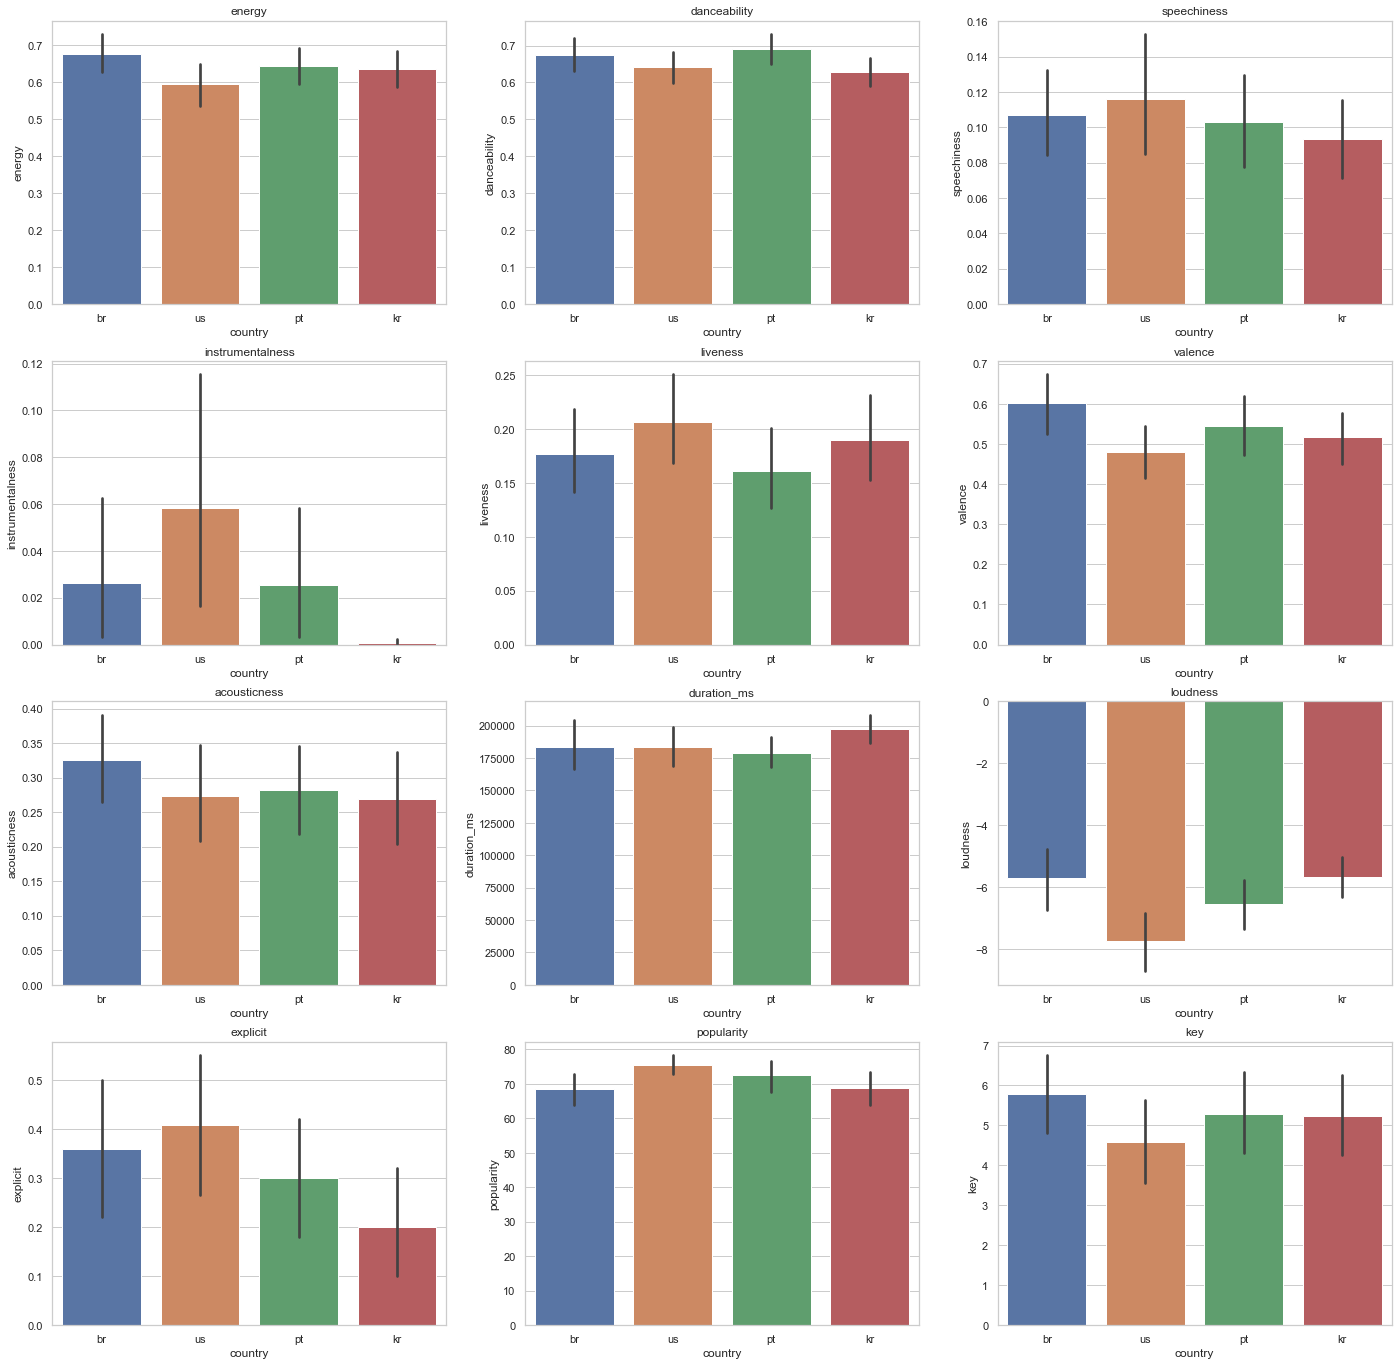

In [11]:
plt.figure(figsize=[24,24])
plt.subplot(4,3,1)
sns.barplot('country','energy',data=df_top_50_daily).set_title('energy')
plt.subplot(4,3,2)
sns.barplot('country','danceability',data=df_top_50_daily).set_title('danceability')
plt.subplot(4,3,3)
sns.barplot('country','speechiness',data=df_top_50_daily).set_title('speechiness')
plt.subplot(4,3,4)
sns.barplot('country','instrumentalness',data=df_top_50_daily).set_title('instrumentalness')
plt.subplot(4,3,5)
sns.barplot('country','liveness',data=df_top_50_daily).set_title('liveness')
plt.subplot(4,3,6)
sns.barplot('country','valence',data=df_top_50_daily).set_title('valence')
plt.subplot(4,3,7)
sns.barplot('country','acousticness',data=df_top_50_daily).set_title('acousticness')
plt.subplot(4,3,8)
sns.barplot('country','duration_ms',data=df_top_50_daily).set_title('duration_ms')
plt.subplot(4,3,9)
sns.barplot('country','loudness',data=df_top_50_daily).set_title('loudness')
plt.subplot(4,3,10)
sns.barplot('country','explicit',data=df_top_50_daily).set_title('explicit')
plt.subplot(4,3,11)
sns.barplot('country','popularity',data=df_top_50_daily).set_title('popularity')
plt.subplot(4,3,12)
sns.barplot('country','key',data=df_top_50_daily).set_title('key')

In [83]:
repeat_song = df_top_50_daily["track"].value_counts().head(25)
repeat_song

STAY (with Justin Bieber)                 4
Beggin'                                   4
Smells Like Teen Spirit                   4
As the World Caves In                     3
2055                                      3
Bezos I                                   3
Not Around                                3
double take                               3
My Potna Dem                              3
Pain                                      3
Pepas                                     3
Love Tonight - Edit                       3
Everywhereigo                             3
Matter of Time (feat. Alex Maher)         2
I WANNA BE YOUR SLAVE                     2
Senta Danada                              2
Beethoven                                 2
MORENA                                    2
Woman                                     2
FVN!                                      2
Strange                                   2
París                                     2
Need To Know                    

'Aug-12-2021'